This script in made to analyse results of the machine learning model and build two plots that deals with Gini index and square meter price. 

Script by Lars Kjær

In [3]:
from pathlib import Path
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

In [87]:
# Load parameter data
input_path = Path.cwd() / 'ml_data/fitted_models' # path of files to be found
parameter_data = pd.read_csv(input_path / 'coefficients_lasso.csv')

parameter = 'gini_index'
df_coefficients = parameter_data[parameter_data['parameter'] == parameter].iloc[:, [1,3]].rename(columns={'value':'gini_index'})

# Load municipality data
muni_codes = pd.read_csv('municipality_number_codes.csv', sep=';', names=['muni_name', 'muni_code'] )


# Merge the parameter and the geo data 
merged_df = muni_codes.merge(df_coefficients, on='muni_code')

# extract data for plot -- sum of municipalities Explanatory factor
gini_is_zero = len(merged_df[merged_df['gini_index'] == 0])
filtered_subset_gini_less_than_zero = len(merged_df[merged_df['gini_index'] < 0])
filtered_subset_gini_greater_than_zero = len(merged_df[merged_df['gini_index'] > 0])
gini_index_dist1 = pd.DataFrame({'Explanatory factor = zero.' : [gini_is_zero],
                                'Explanatory factor < zero.' : [filtered_subset_gini_less_than_zero],
                                'Explanatory factor > zero' : [filtered_subset_gini_greater_than_zero]})
gini_index_dist1 = gini_index_dist1.T.reset_index().rename(columns = {'index':'observations',
                                      0: 'sum'})


# extract data for plot - filtered_subset_gini_greater_than_zero
filtered_subset_gini_greater_than_zero = merged_df[merged_df['gini_index'] > 0]
filtered_subset_gini_greater_than_zero = filtered_subset_gini_greater_than_zero.sort_values('gini_index')

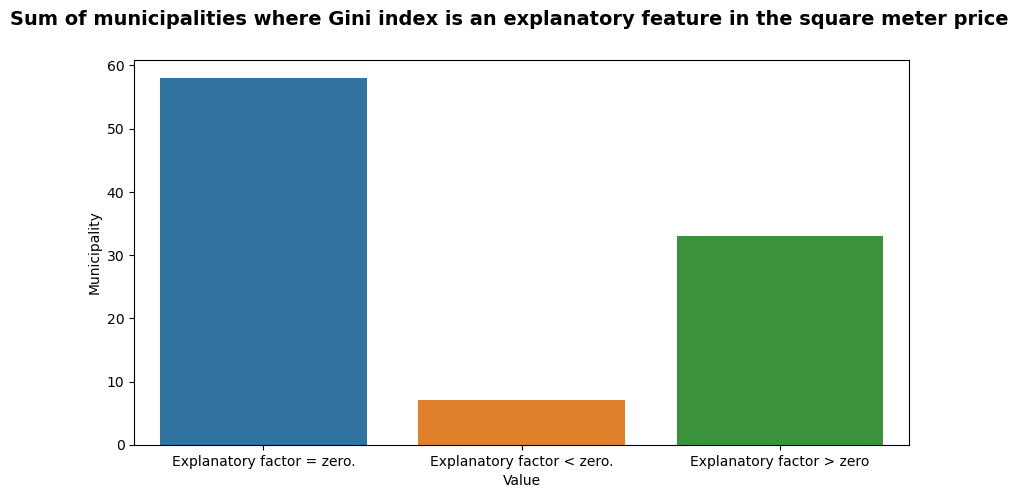

In [88]:
# Create a figure and subplots with two columns
fig, ax = plt.subplots(figsize=(10, 5))

# Create the bar plot using sns.barplot
ax = sns.barplot(x='observations', y='sum', data=gini_index_dist1)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Municipality')

# Title the figure
fig.suptitle('Sum of municipalities where Gini index is an explanatory feature in the square meter price', fontsize=14, fontweight='bold');

# Adjust layout
#plt.tight_layout()

# Show the plots
plt.show()

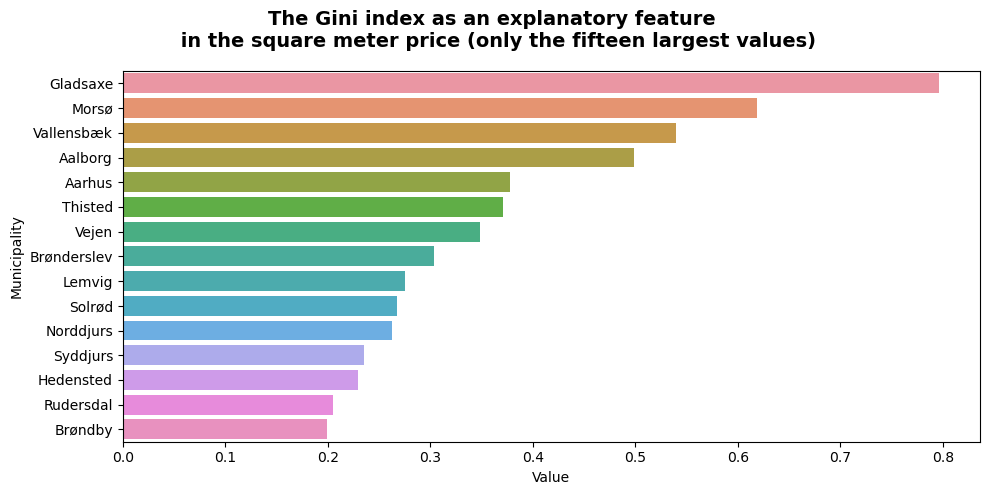

In [89]:
# Create a figure and subplots with two columns
fig, ax = plt.subplots(figsize=(10, 5))

# Create the bar plot using sns.barplot
ax = sns.barplot(x='gini_index', y='muni_name', data=filtered_subset_gini_greater_than_zero.sort_values('gini_index',
                                                                                                       ascending=False).head(15))

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Municipality')

# Title the figure
fig.suptitle('The Gini index as an explanatory feature \n in the square meter price (only the fifteen largest values)', fontsize=14, fontweight='bold');

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()